In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

# import matplotlib.pyplot as plt
# import numpy as np
# import scipy.optimize as opt
# from plotData import *
# import costFunctionReg as cfr
# import plotDecisionBoundary as pdb
# import predict as predict

In [2]:
# Load csv file without column name
df = pd.read_csv('./ex2data2.txt', names=['test-1', 'test-2', 'label'])

In [3]:
X = df.loc[:, ['test-1', 'test-2']]
y = df.loc[:, 'label']

# row number and column number
m, n = df.iloc[:, :-1].shape

# dataframe to numpy matrix 
X = df.loc[:, ['test-1', 'test-2']]

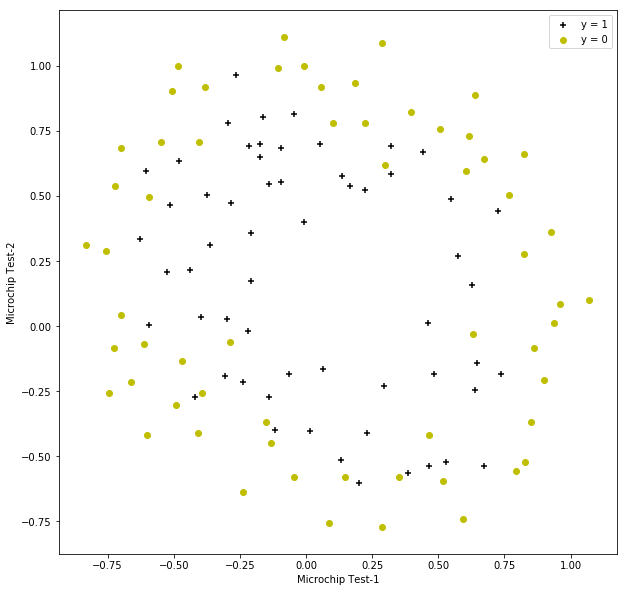

In [4]:
plt.figure(figsize=(10, 10))
plt.scatter(
    df.loc[df.label == 1, ['test-1']],
    df.loc[df.label == 1, ['test-2']],
    marker='+',
    color='black',
    label='y = 1'
)

plt.scatter(
    df.loc[df.label == 0, ['test-1']],
    df.loc[df.label == 0, ['test-2']],
    marker='o',
    color='y',
    label='y = 0'
)

plt.xlabel('Microchip Test-1')
plt.ylabel('Microchip Test-2')
plt.legend()

In [6]:
def map_feature(x1, x2):
    degree = 6

    x1 = x1.reshape((x1.size, 1))
    x2 = x2.reshape((x2.size, 1))
    result = np.ones(x1[:, 0].shape)

    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            result = np.c_[result, (x1**(i-j)) * (x2**j)]

    return result


In [7]:

# ===================== Part 1: Regularized Logistic Regression =====================
# In this part, you are given a dataset with data points that are not
# linearly separable. However, you would still like to use logistic
# regression to classify the data points.

# To do so, you introduce more feature to use -- in particular, you add
# polynomial features to our data matrix (similar to polynomial regression)
#

# Add polynomial features

# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled

X = map_feature(X.iloc[:, 0].values, X.iloc[:, 1].values)

In [9]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
lmd = 1

In [10]:
# sigmoid function
sigmoid_func = lambda x: 1 / (1 + np.exp(-x))
# sigmoid_func = lambda x: np.exp(x) / (np.exp(x)+1)

In [11]:
# hypothesis function 
h_func = lambda theta, X: sigmoid_func(theta @ X.transpose()) 

In [12]:
def cost_function_reg(theta, X, y, lmd):
    cost = 0
    grad = np.zeros(theta.shape)

    # ===================== Your Code Here =====================
    # Instructions : Compute the cost of a particular choice of theta
    #                You should set cost and grad correctly.
    #
    cost = (-y @ np.log(h_func(theta, X)) - (1-y) @ np.log((1-h_func(theta, X)))) / m  + (theta @ theta) * lmd / (2*m) 
    
    for idx in range(theta.size):
        grad[idx] += ((h_func(theta, X) - y) @ X[:, idx]) / m + (0 if idx == 0 else lmd * theta[idx] / m)
    
    # ===========================================================

    return cost, grad


In [13]:
# Compute and display initial cost and gradient for regularized logistic regression
cost, grad = cost_function_reg(initial_theta, X, y, lmd)

# np.set_printoptions(formatter={'float': '{: 0.4f}\n'.format})
print('Cost at initial theta (zeros): {}'.format(cost))
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - first five values only: \n{}'.format(grad[0:5]))
print('Expected gradients (approx) - first five values only: \n 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115')

Cost at initial theta (zeros): 0.6931471805599453
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only: 
[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]
Expected gradients (approx) - first five values only: 
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


In [14]:
# Compute and display cost and gradient with non-zero theta
test_theta = np.ones(X.shape[1])

cost, grad = cost_function_reg(test_theta, X, y, lmd)

print('Cost at test theta: {}'.format(cost))
print('Expected cost (approx): 2.13')
print('Gradient at test theta - first five values only: \n{}'.format(grad[0:5]))
print('Expected gradients (approx) - first five values only: \n 0.3460\n 0.0851\n 0.1185\n 0.1506\n 0.0159')

Cost at test theta: 2.1390856028014507
Expected cost (approx): 2.13
Gradient at test theta - first five values only: 
[0.34604507 0.08508073 0.11852457 0.1505916  0.01591449]
Expected gradients (approx) - first five values only: 
 0.3460
 0.0851
 0.1185
 0.1506
 0.0159


In [15]:
# ===================== Part 2: Regularization and Accuracies =====================
# Optional Exercise:
# In this part, you will get to try different values of lambda and
# see how regularization affects the decision boundary
#
# Try the following values of lambda (0, 1, 10, 100).
#
# How does the decision boundary change when you vary lambda? How does
# the training set accuracy vary?
#

# Initializa fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1 (you should vary this)
lmd = 1

# Optimize
def cost_func(t):
    return cost_function_reg(t, X, y, lmd)[0]

def grad_func(t):
    return cost_function_reg(t, X, y, lmd)[1]

theta, cost, *unused = opt.fmin_bfgs(f=cost_func, fprime=grad_func, x0=initial_theta, maxiter=400, full_output=True, disp=False)


In [17]:
def plot_decision_boundary(theta, X, y):
    # plot_data(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Only need two points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1/theta[2]) * (theta[1]*plot_x + theta[0])

        plt.plot(plot_x, plot_y)

        plt.legend(['Decision Boundary', 'Admitted', 'Not admitted'], loc=1)
        plt.axis([30, 100, 30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))

        # Evaluate z = theta*x over the grid
        for i in range(0, u.size):
            for j in range(0, v.size):
                z[i, j] = np.dot(map_feature(u[i], v[j]), theta)

        z = z.T

        # Plot z = 0
        # Notice you need to specify the range [0, 0]
        cs = plt.contour(u, v, z, levels=[0], colors='g', label='Decision Boundary', alpha=0.6)
        plt.legend([cs.collections[0]], ['Decision Boundary'])


Plotting decision boundary ...


/Users/dream/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)


Text(0, 0.5, 'Microchip Test 2')

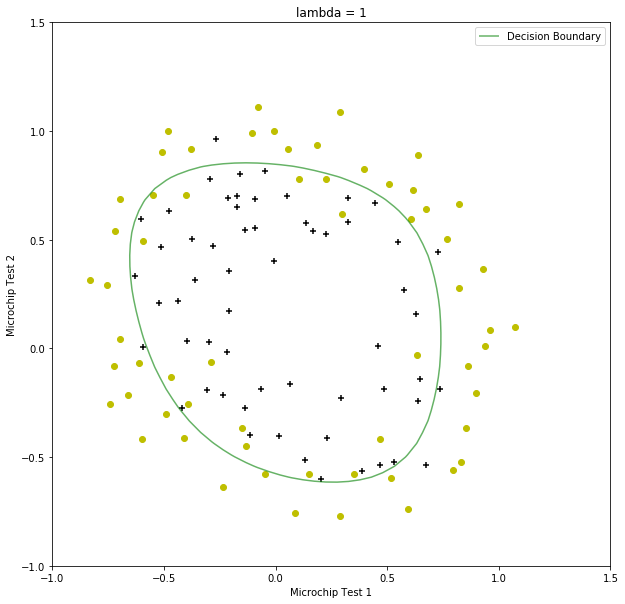

In [18]:

# Plot boundary
print('Plotting decision boundary ...')

plt.figure(figsize=(10, 10))
plt.scatter(
    df.loc[df.label == 1, ['test-1']],
    df.loc[df.label == 1, ['test-2']],
    marker='+',
    color='black',
    label='y = 1'
)

plt.scatter(
    df.loc[df.label == 0, ['test-1']],
    df.loc[df.label == 0, ['test-2']],
    marker='o',
    color='y',
    label='y = 0'
)


plot_decision_boundary(theta, X, y)


plt.title('lambda = {}'.format(lmd))

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')


In [19]:
def predict(theta, X):
    # ===================== Your Code Here =====================
    # Instructions : Complete the following code to make predictions using
    #                your learned logistic regression parameters.
    #                You should set p to a 1D-array of 0's and 1's
    #

    p = 1 * (0.5 <= sigmoid_func(theta @ X.transpose()))
    # ===========================================================

    return p


In [20]:

# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: {:0.4f}'.format(np.mean(y == p) * 100))
print('Expected accuracy (with lambda = 1): 83.1 (approx)')

Train Accuracy: 83.0508
Expected accuracy (with lambda = 1): 83.1 (approx)
